<a href="https://colab.research.google.com/github/Sushen28/ML_Projects/blob/main/SignatureVerification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [ ]:
#Useful libraries
import numpy as np
import cv2
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
from scipy import ndimage
from skimage.measure import regionprops
from skimage import io
from numpy.lib.type_check import real
from skimage.filters import threshold_otsu   # For finding the threshold for grayscale to binary conversion
import tensorflow as tf
import pandas as pd
import numpy as np
from time import time
import keras
from tensorflow.python.framework import ops
ops.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# PATH


In [ ]:
real_path = "/content/drive/MyDrive/data/real" #Path of real signature images
forged_path = "/content/drive/MyDrive/data/forged" #path of forged signature images

# Pre-Processing

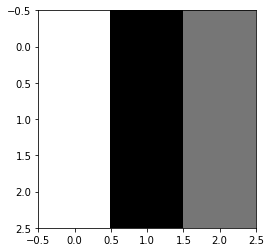

In [ ]:
def rgbgrey(img):
    # Converts rgb to grayscale
    grey_image = np.zeros((img.shape[0], img.shape[1]))
    for row in range(len(img)):
        for col in range(len(img[row])):
            grey_image[row][col] = np.average(img[row][col])
    return grey_image
import numpy as np

image = np.array([[[204, 204, 255], [0, 0, 0], [51, 51, 204]],
                [[204, 204, 255], [0, 0, 0], [51, 51, 204]],
                [[204, 204, 255], [0, 0, 0], [51, 51, 204]]], dtype=np.uint8)

greyimage = rgbgrey(image)

plt.imshow(greyimage, cmap="gray")
plt.show()

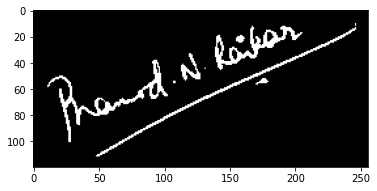

In [ ]:
def greybin(img):
    # Converts the grayscale image to binary
    blur_rad_image = 0.8
    img = ndimage.gaussian_filter(img, blur_rad_image)  # to remove small components or noise
#     img = ndimage.binary_erosion(img).astype(img.dtype)
    threshold_image = threshold_otsu(img)
    bin_image = img > threshold_image
    bin_image_1 = np.logical_not(bin_image)
    return bin_image_1

import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage.filters import threshold_otsu
from skimage import io
from scipy import ndimage

image = io.imread('/content/drive/MyDrive/data/real/002002_003.png')
gray = np.mean(image, axis=2)

binimg = greybin(gray)

plt.imshow(binimg, cmap=plt.cm.gray)
plt.show()

In [ ]:
def preproc(path, img=None, display=True):
    if img is None:
        img = mpimg.imread(path)
    if display:
        plt.imshow(img)
        plt.show()
    grey_image = rgbgrey(img) #rgb to grey
    if display:
        plt.imshow(grey_image, cmap = matplotlib.cm.Greys_r)
        plt.show()
    binimg = greybin(grey_image) #grey to binary
    if display:
        plt.imshow(binimg, cmap = matplotlib.cm.Greys_r)
        plt.show()
    r, c = np.where(binimg==1)
    # Now we will make a bounding box with the boundary as the position of pixels on extreme.
    # Thus we will get a cropped image with only the signature part.
    signimg = binimg[r.min(): r.max(), c.min(): c.max()]
    if display:
        plt.imshow(signimg, cmap = matplotlib.cm.Greys_r)
        plt.show()
    return signimg

In [ ]:
from numpy.lib.type_check import real
import cv2
image_width, image_height, channels = 224, 224, 3
def returnimages(path,image):
    image_data=cv2.imread(path+"/"+ image)                  #bringing the image
    image_data=cv2.resize(image, (image_width, image_height))
    image_data=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_data=to_rgb(image).reshape(1,image_width, image_height,3)/255.0       #resize the image and normalize the image
    return image

def getfiles(num,gen,forg):
    a=os.listdir(gen)
    b=os.listdir(forg)
    c=str(num)
    c=c[2:]
    if(len(c)==2):
        c=c+"0"

    n,m=[],[]
    for i in b:
        if i.endswith(c+".png"):
            n=n+[i]
        elif i.endswith(c+".PNG"):
            n=n+[i]
    for i in a:
        if i.endswith(c+".png"):
            m=m+[i]
        elif i.endswith(c+".PNG"):
            m=m+[i]
    return m.pop(),n,m

def getfiles2(num):
    a=os.listdir(real)
    b=os.listdir(forged)
    c=str(num)
    c=c[2:]
    if(len(c)==2):
        c=c+"0"
    n,m=[],[]
    for i in b:
        if (i.endswith(c+"/content/drive/MyDrive/data/real/004004_002.png") or i.endswith(c+"/content/drive/MyDrive/data/real/004004_002.png") or i.endswith(c+"/content/drive/MyDrive/data/real/004004_002.png")
            or i.endswith(c+"/content/drive/MyDrive/data/real/004004_002.png") or i.endswith(c+"/content/drive/MyDrive/data/real/004004_002.png")):
            n=n+[i]
        elif(i.endswith(c+"/content/drive/MyDrive/data/real/004004_002.PNG") or i.endswith(c+"/content/drive/MyDrive/data/real/004004_002.PNG") or i.endswith(c+"/content/drive/MyDrive/data/real/004004_002.PNG")
            or i.endswith(c+"/content/drive/MyDrive/data/real/004004_002.PNG") or i.endswith(c+"/content/drive/MyDrive/data/real/004004_002.PNG")):
            n=n+[i]
    for i in a:
        if (i.endswith(c+"/content/drive/MyDrive/data/real/004004_002.png") or i.endswith(c+"/content/drive/MyDrive/data/real/004004_002.png") or i.endswith(c+"/content/drive/MyDrive/data/real/004004_002.png")
            or i.endswith(c+"/content/drive/MyDrive/data/real/004004_002.png") or i.endswith(c+"/content/drive/MyDrive/data/real/004004_002.png")):
            m=m+[i]
        elif(i.endswith(c+"/content/drive/MyDrive/data/real/004004_002.PNG") or i.endswith(c+"/content/drive/MyDrive/data/real/004004_002.PNG") or i.endswith(c+"/content/drive/MyDrive/data/real/004004_002.PNG")
            or i.endswith(c+"/content/drive/MyDrive/data/real/004004_002.PNG") or i.endswith(c+"/content/drive/MyDrive/data/real/004004_002.PNG")):

            m=m+[i]
    return m.pop(),n,m

# Feature Extraction

In [ ]:
def Ratio(img):
    a = 0
    for row in range(len(img)):
        for col in range(len(img[0])):
            if img[row][col]==True:
                a = a+1
    total = img.shape[0] * img.shape[1]
    return a/total

In [ ]:
def Centroid(img):
    numOfWhites = 0
    a = np.array([0,0])
    for row in range(len(img)):
        for col in range(len(img[0])):
            if img[row][col]==True:
                b = np.array([row,col])
                a = np.add(a,b)
                numOfWhites += 1
    rowcols = np.array([img.shape[0], img.shape[1]])
    centroid = a/numOfWhites
    centroid = centroid/rowcols
    return centroid[0], centroid[1]

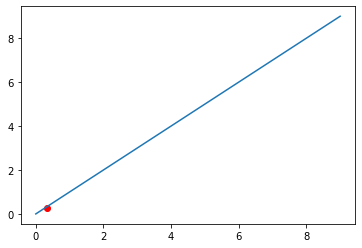

In [ ]:
x = np.arange(0,10)
y = np.arange(0,10)

#Creating a 2D array
image = np.array([[1, 0, 1, 0],
                [0, 1, 1, 0],
                [1, 0, 1, 0],
                [0, 1, 0, 0]])

#Calculating the centroid
x_centroid, y_centroid = Centroid(image)

#Plotting graph
plt.plot(x,y)
plt.scatter(x_centroid, y_centroid, color='red')
plt.show()

In [ ]:
def EccentricitySolidity(img):
    r = regionprops(img.astype("int8"))
    return r[0].eccentricity, r[0].solidity

In [ ]:
def SkewKurtosis(img):
    h,w = img.shape
    x = range(w)  # cols value
    y = range(h)  # rows value
    #calculate projections along the x and y axes
    xp = np.sum(img,axis=0)
    yp = np.sum(img,axis=1)
    #centroid
    cx = np.sum(x*xp)/np.sum(xp)
    cy = np.sum(y*yp)/np.sum(yp)
    #standard deviation
    x2 = (x-cx)**2
    y2 = (y-cy)**2
    sx = np.sqrt(np.sum(x2*xp)/np.sum(img))
    sy = np.sqrt(np.sum(y2*yp)/np.sum(img))

    #skewness
    x3 = (x-cx)**3
    y3 = (y-cy)**3
    skewx = np.sum(xp*x3)/(np.sum(img) * sx**3)
    skewy = np.sum(yp*y3)/(np.sum(img) * sy**3)

    #Kurtosis
    x4 = (x-cx)**4
    y4 = (y-cy)**4
    # 3 is subtracted to calculate relative to the normal distribution
    kurtx = np.sum(xp*x4)/(np.sum(img) * sx**4) - 3
    kurty = np.sum(yp*y4)/(np.sum(img) * sy**4) - 3

    return (skewx , skewy), (kurtx, kurty)

In [ ]:
def getFeatures(path, img=None, display=False):
    if img is None:
        img = mpimg.imread(path)
    img = preproc(path, display=display)
    ratio = Ratio(img)
    centroid = Centroid(img)
    eccentricity, solidity = EccentricitySolidity(img)
    skewness, kurtosis = SkewKurtosis(img)
    retVal = (ratio, centroid, eccentricity, solidity, skewness, kurtosis)
    return retVal

In [ ]:
def getCSVFeatures(path, img=None, display=False):
    if img is None:
        img = mpimg.imread(path)
    temp = getFeatures(path, display=display)
    features = (temp[0], temp[1][0], temp[1][1], temp[2], temp[3], temp[4][0], temp[4][1], temp[5][0], temp[5][1])
    return features

# CSV Creation of images

In [ ]:
def makeCSV():
    if not(os.path.exists('/content/drive/MyDrive/data/Features')):
        os.mkdir('/content/drive/MyDrive/data/Features')
        print('New folder "Features" created')
    if not(os.path.exists('/content/drive/MyDrive/data/Features/Training')):
        os.mkdir('/content/drive/MyDrive/data/Features/Training')
        print('New folder "Features/Training" created')
    if not(os.path.exists('/content/drive/MyDrive/data/Features/Testing')):
        os.mkdir('/content/drive/MyDrive/data/Features/Testing')
        print('New folder "Features/Testing" created')
    # real signature images path
    re_path = real_path
    # forged signature image path
    fo_path = forged_path
    for person in range(1,6):
        per = ('00'+str(person))[-3:]
        print('uploading the all five feature for the image id-',per)

        with open('/content/drive/MyDrive/data/Features/Training/training_'+per+'.csv', 'w') as handle:
            handle.write('ratio,cent_y,cent_x,eccentricity,solidity,skew_x,skew_y,kurt_x,kurt_y,output\n')
            # Training set
            for i in range(0,3):
                extension = ".png"
                extension.lower() if extension.isupper() else extension.upper()
                source = os.path.join(re_path, per+per+'_00'+str(i)+'.png')
                source.lower() if source.isupper() else source.upper()
                features = getCSVFeatures(path=source)
                handle.write(','.join(map(str, features))+',1\n')
            for i in range(0,3):
                extension = ".png"
                extension.lower() if extension.isupper() else extension.upper()
                source = os.path.join(fo_path, '021'+per+'_00'+str(i)+'.png')
                source.lower() if source.isupper() else source.upper()
                features = getCSVFeatures(path=source)
                handle.write(','.join(map(str, features))+',0\n')

        with open('/content/drive/MyDrive/data/Features/Testing/testing_'+per+'.csv', 'w') as handle:
            handle.write('ratio,cent_y,cent_x,eccentricity,solidity,skew_x,skew_y,kurt_x,kurt_y,output\n')
            # Testing set
            for i in range(3, 5):
                extension = ".PNG"
                extension.lower() if extension.isupper() else extension.upper()
                source = os.path.join(re_path, per+per+'_00'+str(i)+'.png')
                source.lower() if source.isupper() else source.upper()
                features = getCSVFeatures(path=source)
                handle.write(','.join(map(str, features))+',1\n')
            for i in range(3,5):
                extension = ".PNG"
                extension.lower() if extension.isupper() else extension.upper()
                source = os.path.join(fo_path, '021'+per+'_00'+str(i)+'.png')
                source.lower() if source.isupper() else source.upper()
                features = getCSVFeatures(path=source)
                handle.write(','.join(map(str, features))+',0\n')

In [ ]:
makeCSV()

uploading the all five feature for the image id- 001
uploading the all five feature for the image id- 002
uploading the all five feature for the image id- 003
uploading the all five feature for the image id- 004
uploading the all five feature for the image id- 005


# Model

In [ ]:
def testing(path):
    feature = getCSVFeatures(path)
    if not(os.path.exists('/content/drive/MyDrive/data/TestFeatures')):
        os.mkdir('/content/drive/MyDrive/data/TestFeatures')
    with open('/content/drive/MyDrive/data/TestFeatures/testcsv.csv', 'w') as handle:
        handle.write('ratio,cent_y,cent_x,eccentricity,solidity,skew_x,skew_y,kurt_x,kurt_y\n')
        handle.write(','.join(map(str, feature))+'\n')

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [ ]:
n_input = 9
train_person_id = input("Enter image id : ")
test_image_path = input("Enter the path of signature image : ")
train_path = '/content/drive/MyDrive/data/Features/Training/training_'+train_person_id+'.csv'
testing(test_image_path)
test_path = '/content/drive/MyDrive/data/TestFeatures/testcsv.csv'

def readCSV(train_path, test_path, type2=False):
    # Reading train data
    df = pd.read_csv(train_path, usecols=range(n_input))
    train_input = np.array(df.values)
    train_input = train_input.astype(np.float32, copy=False)  # Converting input to float_32
    df = pd.read_csv(train_path, usecols=(n_input,))
    temp = [elem[0] for elem in df.values]
    correct = np.array(temp)
    corr_train = keras.utils.to_categorical(correct,2)      # Converting to one hot
    # Reading test data
    df = pd.read_csv(test_path, usecols=range(n_input))
    test_input = np.array(df.values)
    test_input = test_input.astype(np.float32, copy=False)
    if not(type2):
        df = pd.read_csv(test_path, usecols=(n_input,))
        temp = [elem[0] for elem in df.values]
        correct = np.array(temp)
        corr_test = kearas.utils.to_categorical(correct,2)      # Converting to one hot
    if not(type2):
        return train_input, corr_train, test_input, corr_test
    else:
        return train_input, corr_train, test_input

tf.reset_default_graph()
# Parameters
learning_rate = 0.001
training_epochs = 1000
display_step = 1

# Network Parameters
n_hidden_1 = 7 # 1st layer number of neurons
n_hidden_2 = 10 # 2nd layer number of neurons
n_hidden_3 = 30 # 3rd layer
n_classes = 2 # no. of classes (genuine or forged)

# tf Graph input
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1], seed=1)),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_1, n_classes], seed=2))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1], seed=3)),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_classes], seed=4))
}


# Create model
def multilayer_perceptron(x):
    layer_1 = tf.tanh((tf.matmul(x, weights['h1']) + biases['b1']))
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    out_layer = tf.tanh(tf.matmul(layer_1, weights['out']) + biases['out'])
    return out_layer

# Construct model
logits = multilayer_perceptron(X)

# Define loss and optimizer

loss_op = tf.reduce_mean(tf.squared_difference(logits, Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
# For accuracies
pred = tf.nn.softmax(logits)  # Apply softmax to logits
correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# Initializing the variables
init = tf.global_variables_initializer()

def evaluate(train_path, test_path, type2=False):
    if not(type2):
        train_input, corr_train, test_input, corr_test = readCSV(train_path, test_path)
    else:
        train_input, corr_train, test_input = readCSV(train_path, test_path, type2)
    ans = 'Random'
    with tf.Session() as sess:
        sess.run(init)
        # Training cycle
        for epoch in range(training_epochs):
            # Run optimization op (backprop) and cost op (to get loss value)
            _, cost = sess.run([train_op, loss_op], feed_dict={X: train_input, Y: corr_train})
            if cost<0.0001:
                break
#             # Display logs per epoch step
#             if epoch % 999 == 0:
#                 print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(cost))
#         print("Optimization Finished!")

        # Finding accuracies
        accuracy1 =  accuracy.eval({X: train_input, Y: corr_train})
#         print("Accuracy for train:", accuracy1)
#         print("Accuracy for test:", accuracy2)
        if type2 is False:
            accuracy2 =  accuracy.eval({X: test_input, Y: corr_test})
            return accuracy1, accuracy2
        else:
            prediction = pred.eval({X: test_input})
            if prediction[0][1]>prediction[0][0]:
                print('Real image')
                return True
            else:
                print('Forged image')
                return False


def trainAndTest(rate=0.001, epochs=1700, neurons=7, display=False):
    start = time()

    # Parameters
    global training_rate, training_epochs, n_hidden_1
    learning_rate = rate
    training_epochs = epochs

    # Network Parameters
    n_hidden_1 = neurons # 1st layer number of neurons
    n_hidden_2 = 7 # 2nd layer number of neurons
    n_hidden_3 = 30 # 3rd layer

    train_avg, test_avg = 0, 0
    n = 10
    for i in range(1,n+1):
        if display:
            print("Running for Person id",i)
        temp = ('0'+str(i))[-2:]
        train_score, test_score = evaluate(train_path.replace('01',temp), test_path.replace('01',temp))
        train_avg += train_score
        test_avg += test_score
    if display:
#         print("Number of neurons in Hidden layer-", n_hidden_1)
        print("Training average-", train_avg/n)
        print("Testing average-", test_avg/n)
        print("Time taken-", time()-start)
    return train_avg/n, test_avg/n, (time()-start)/n


evaluate(train_path, test_path, type2=True)

Enter image id : 001
Enter the path of signature image : /content/drive/MyDrive/data/real/001001_001.png
Real image


True